# Regression

In [1]:
# Importando os datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

reg = pd.read_csv("regression.csv")

In [2]:
corr_matrix = reg.corr()


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,target
v_1,1.000000,-0.008321,0.021497,0.011543,0.033599,0.034651,0.013683,0.014203,-0.001179,0.016576,0.046850
v_2,-0.008321,1.000000,0.004328,0.013664,0.033571,-0.028073,-0.023388,0.006123,-0.004907,0.003013,-0.009264
v_3,0.021497,0.004328,1.000000,0.020646,0.018596,0.000268,0.046311,0.001207,0.012514,0.019062,0.009007
v_4,0.011543,0.013664,0.020646,1.000000,-0.020882,0.011845,-0.046403,0.043885,0.005867,-0.017331,0.000736
v_5,0.033599,0.033571,0.018596,-0.020882,1.000000,-0.025808,-0.036690,0.013021,0.001638,-0.002321,0.448820
v_6,0.034651,-0.028073,0.000268,0.011845,-0.025808,1.000000,0.001696,-0.005546,-0.043814,-0.025036,0.881741
v_7,0.013683,-0.023388,0.046311,-0.046403,-0.036690,0.001696,1.000000,-0.020513,-0.013435,0.040929,-0.015795
v_8,0.014203,0.006123,0.001207,0.043885,0.013021,-0.005546,-0.020513,1.000000,-0.010461,-0.019966,0.001183
v_9,-0.001179,-0.004907,0.012514,0.005867,0.001638,-0.043814,-0.013435,-0.010461,1.000000,0.017617,-0.038395
v_10,0.016576,0.003013,0.019062,-0.017331,-0.002321,-0.025036,0.040929,-0.019966,0.017617,1.000000,-0.023478


In [12]:
corr_matrix[corr_matrix["target"] > 0.1]

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,target
v_5,0.033599,0.033571,0.018596,-0.020882,1.000000,-0.025808,-0.036690,0.013021,0.001638,-0.002321,0.448820
v_6,0.034651,-0.028073,0.000268,0.011845,-0.025808,1.000000,0.001696,-0.005546,-0.043814,-0.025036,0.881741
target,0.046850,-0.009264,0.009007,0.000736,0.448820,0.881741,-0.015795,0.001183,-0.038395,-0.023478,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

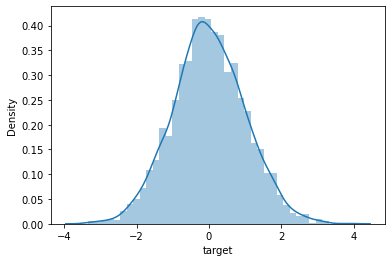

In [3]:
sns.distplot(reg["target"])

<AxesSubplot:xlabel='target'>

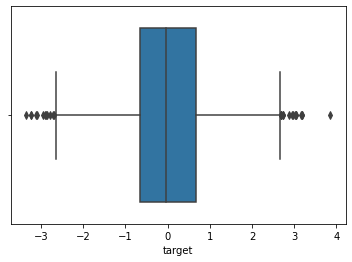

In [4]:
sns.boxplot(x=reg["target"])

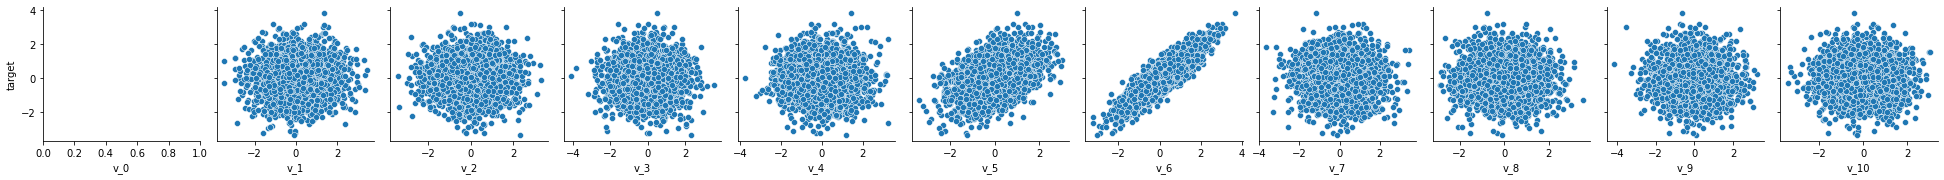

In [5]:
sns.pairplot(data=reg, x_vars=[f"v_{i}" for i in np.arange(0,11)], y_vars=["target"])


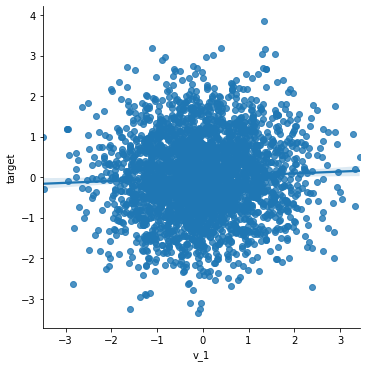

In [6]:
sns.lmplot(x="v_1", y="target", data=reg)

In [7]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error


SEED=301
np.random.seed(SEED)

x = reg.iloc[:,:-1]
y = reg.iloc[:,-1]

linreg = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True)

R_2 = cross_validate(linreg,x,y, cv=kfold, scoring=make_scorer(r2_score), return_train_score=True)

In [8]:
R_2

{'fit_time': array([0.0704236 , 0.00199986, 0.00200009, 0.00199986, 0.00100017]),
 'score_time': array([0.0010004 , 0.00100183, 0.00099993, 0.00100017, 0.00099969]),
 'test_score': array([0.99999972, 0.99999973, 0.9999997 , 0.99999974, 0.99999976]),
 'train_score': array([0.99999974, 0.99999974, 0.99999974, 0.99999973, 0.99999973])}

In [9]:
import statsmodels.api as sm

x_const = sm.add_constant(x)
modelo_statsmodels = sm.OLS(y, x_const, hasconst=True).fit()

In [10]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.130e+09
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:23:47   Log-Likelihood:                 18462.
No. Observations:                3000   AIC:                        -3.690e+04
Df Residuals:                    2989   BIC:                        -3.684e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047   9.41e-06    494.533      0.000       0.005       0.005
v_1         2.003e-05   9.29e-06      2.155      0.031    1.81e-06    3.82e-05
v_2        -1.032e-05   9.51e-06     -1.086      0.278    -2.9e-05    8.32e-06
v_3        -8.344e-06   9.44e-06     -0.884      0.377   -2.68e-05    1.02e-05
v_4         1.007e-06   9.47e-06      0.106      0.915   -1.76e-05    1.96e-05
v_5            0.4790   9.57e-06      5e+04      0.000       0.479       0.479
v_6            0.9106   9.61e-06   9.48e+04      0.000       0.911       0.911
v_7         1.986e-06   9.35e-06      0.213      0.832   -1.63e-05    2.03e-05
v_8        -3.613e-06   9.55e-06     -0.378      0.705   -2.23e-05    1.51e-05
v_9        -1.769e-06    9.3e-06     -0.190      0.849      -2e-05    1.65e-05
v_10       -2.966e-06    9.6e-06     -0.309      0.757   -2.18e-05    1.59e-05
==============================================================================
Omnibus:                        1.175   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.121
Skew:                           0.012   Prob(JB):                        0.571
Kurtosis:                       3.091   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# The statistical analysis above, the correlation matrix and the scatterplots shown in the beginning indicate that
# only variables v_5 and v_6 are relevant.
# Due to that, let's see the impact of removing them.
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error


SEED=301
np.random.seed(SEED)
reg = reg[["v_5", "v_6", "target"]]
x = reg.iloc[:,:-1]
y = reg.iloc[:,-1]

linreg = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True)

R_2 = cross_validate(linreg,x,y, cv=kfold, scoring=make_scorer(r2_score), return_train_score=True)
R_2

{'fit_time': array([0.00300908, 0.00199962, 0.00200248, 0.00199842, 0.0010004 ]),
 'score_time': array([0.00099206, 0.00199819, 0.00199866, 0.0010047 , 0.0009985 ]),
 'test_score': array([0.99999972, 0.99999974, 0.99999971, 0.99999974, 0.99999976]),
 'train_score': array([0.99999974, 0.99999973, 0.99999974, 0.99999973, 0.99999973])}